# Pymaceuticals Challenge Analysis

###### For this Module 5 Homework, I noticed a few trends in the data. I was surprised by the lack of outliers in the data, but that means to me that the mice are responding in very similar ways to the treatments! I also discerned that the Capomulin regimen seemed to work well, given the line plot showing tumor volume over time. There is also a correlation between mouse weight and tumor volume. 

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

mouse_metadata_path = "C:\\Users\\juliu\\OneDrive\\Desktop\\penn-repositories\\pymaceuticals-challenge\\Data Sources\\Mouse_metadata.csv"
study_results_path = "C:\\Users\\juliu\\OneDrive\\Desktop\\penn-repositories\\pymaceuticals-challenge\\Data Sources\\Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

pymaceuticals_merged_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
pymaceuticals_merged_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [22]:
unique_mice_count = pymaceuticals_merged_data['Mouse ID'].nunique()
print("Number of unique mice IDs:", unique_mice_count)

Number of unique mice IDs: 249


In [23]:
duplicate_mice = pymaceuticals_merged_data[pymaceuticals_merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print("Mouse IDs with duplicate time points:")
print(duplicate_mice['Mouse ID'].unique())

Mouse IDs with duplicate time points:
['g989']


In [24]:
mouse_id = 'g989'
duplicate_mouse_data = pymaceuticals_merged_data[pymaceuticals_merged_data['Mouse ID'] == mouse_id]
print("Data associated with mouse ID", mouse_id, "with duplicate time points:")
duplicate_mouse_data

Data associated with mouse ID g989 with duplicate time points:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [25]:
cleaned_pymaceuticals = pymaceuticals_merged_data.drop(pymaceuticals_merged_data[pymaceuticals_merged_data['Mouse ID'] == mouse_id].index)
print("Cleaned DataFrame:")
cleaned_pymaceuticals

Cleaned DataFrame:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [26]:
unique_mice_id_count = cleaned_pymaceuticals['Mouse ID'].nunique()
print("Number of unique mice IDs:", unique_mice_id_count)

Number of unique mice IDs: 248


In [27]:
grouped_data = cleaned_pymaceuticals.groupby('Drug Regimen')

mean_volume = grouped_data['Tumor Volume (mm3)'].mean()
median_volume = grouped_data['Tumor Volume (mm3)'].median()
variance_volume = grouped_data['Tumor Volume (mm3)'].var()
std_volume = grouped_data['Tumor Volume (mm3)'].std()
sem_volume = grouped_data['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({
    'Mean Tumor Volume': mean_volume,
    'Median Tumor Volume': median_volume,
    'Tumor Volume Variance': variance_volume,
    'Tumor Volume Std. Dev.': std_volume,
    'Tumor Volume Std. Err.': sem_volume})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
summary_stats = cleaned_pymaceuticals.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


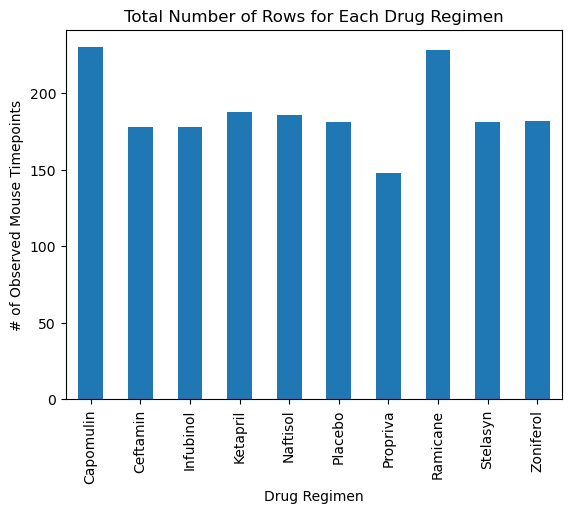

In [29]:
grouped_data = cleaned_pymaceuticals.groupby('Drug Regimen')

row_count = grouped_data['Mouse ID'].count()

row_count.plot.bar()

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Total Number of Rows for Each Drug Regimen')

plt.show()

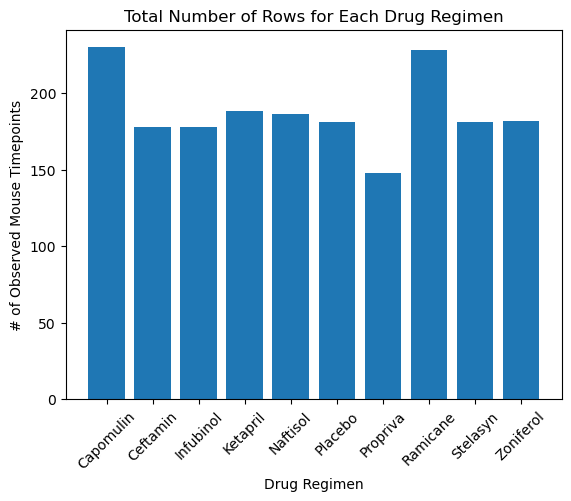

In [30]:
grouped_data = cleaned_pymaceuticals.groupby('Drug Regimen')

row_count = grouped_data['Mouse ID'].count()

drug_regimens = row_count.index.tolist()
counts = row_count.tolist()

plt.bar(drug_regimens, counts)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Total Number of Rows for Each Drug Regimen')

plt.xticks(rotation=45)

plt.show()

In [31]:
gender_counts = cleaned_pymaceuticals['Sex'].value_counts()

gender_df = pd.DataFrame(gender_counts)

gender_df

print(gender_df)

        count
Sex          
Male      958
Female    922


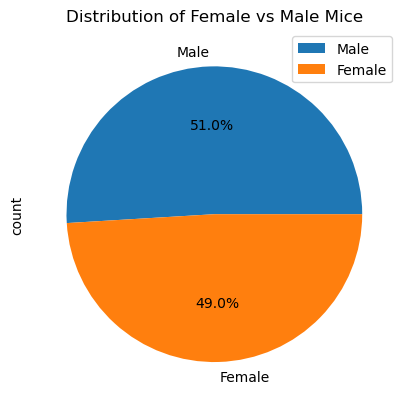

In [32]:
gender_df.plot.pie(y=0, autopct='%1.1f%%')

plt.title('Distribution of Female vs Male Mice')

plt.show()

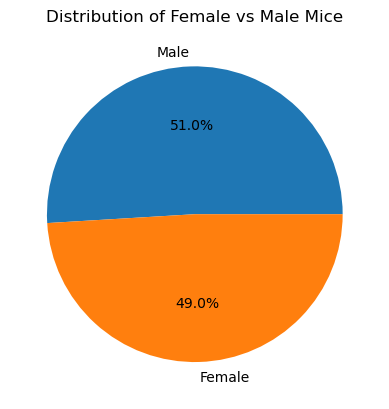

In [33]:
gender = ['Male', 'Female']
count = [958, 922]

plt.pie(count, labels=gender, autopct='%1.1f%%')
plt.title('Distribution of Female vs Male Mice')
plt.show()

In [34]:
filtered_df = cleaned_pymaceuticals[cleaned_pymaceuticals['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

last_timepoint = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

merged_df = pd.merge(last_timepoint, filtered_df, on=['Mouse ID', 'Timepoint'])

merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [35]:
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_vol_list = []

for drug_regimen in treatments:
    tumor_vol  = merged_df.loc[merged_df["Drug Regimen"] == drug_regimen, "Tumor Volume (mm3)"]
    
    tumor_vol_list.append(tumor_vol)
    
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lower_quart = quartiles[.25]
    upper_quart = quartiles[.75]
    iqr = upper_quart - lower_quart
    
    lower_bound = lower_quart - (1.5 * iqr)
    upper_bound = upper_quart + (1.5 * iqr)
    
    outliers = tumor_vol.loc[(tumor_vol < lower_bound)|(tumor_vol > upper_bound)]

    print(f"{drug_regimen}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


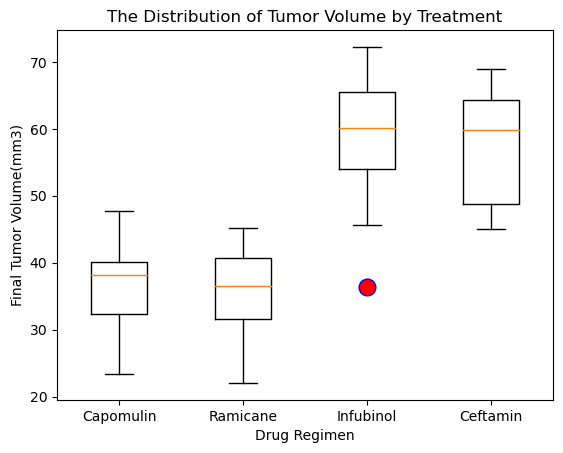

In [36]:
fig1, ax1 = plt.subplots()
flierprops = dict(marker = "o", markerfacecolor = 'red', markersize=12,
                 markeredgecolor= 'blue')

ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Final Tumor Volume(mm3)")
ax1.set_title("The Distribution of Tumor Volume by Treatment")
ax1.boxplot(tumor_vol_list, labels=treatments, flierprops=flierprops)
plt.show()

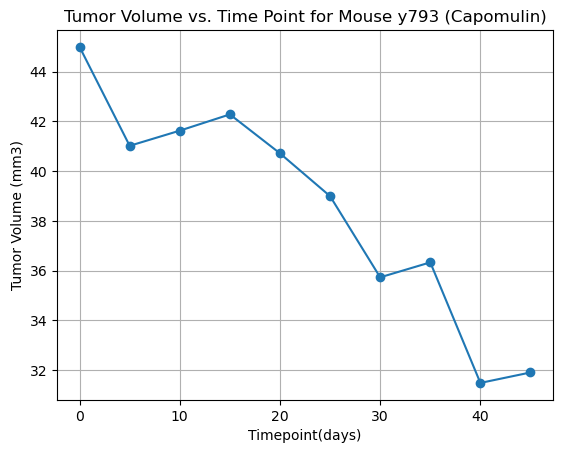

In [37]:
# Filter the data for a single mouse treated with Capomulin
mouse_id = 'y793'
capomulin_data = cleaned_pymaceuticals[(cleaned_pymaceuticals['Mouse ID'] == mouse_id) & (cleaned_pymaceuticals['Drug Regimen'] == 'Capomulin')]

# Extract the time points and tumor volumes for the selected mouse
timepoints = capomulin_data['Timepoint']
tumor_volumes = capomulin_data['Tumor Volume (mm3)']

# Generate the line plot
plt.plot(timepoints, tumor_volumes, marker='o')
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)')
plt.grid(True)
plt.show()

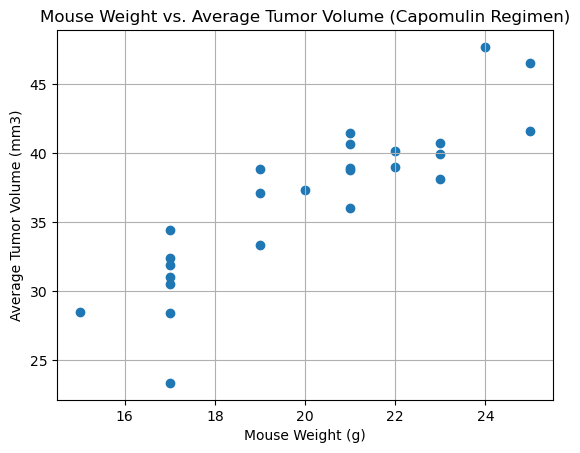

In [38]:
# Filter the data for the Capomulin regimen
capomulin_data = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Extract the mouse weights
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].unique().str[0]

# Generate the scatter plot
plt.scatter(mouse_weights, avg_tumor_volume)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.grid(True)
plt.show()

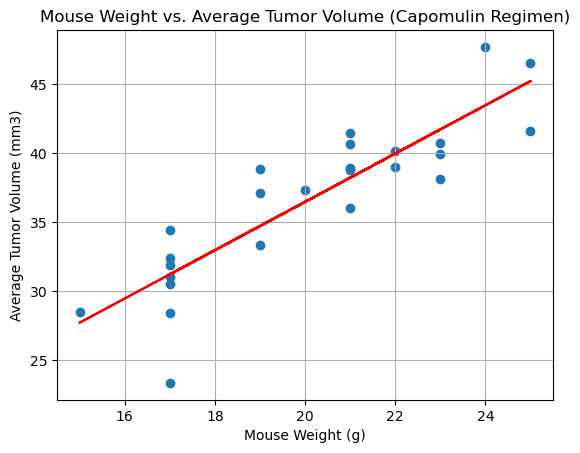

Correlation Coefficient: 0.8767060403658118
Linear Regression Model:
Slope: 1.7504682289585034
Intercept: 1.4481469525549073
R-value: 0.8767060403658117
P-value: 9.084429088673363e-09
Standard Error: 0.20026513236453652


In [39]:
from scipy.stats import linregress

# Filter the data for the Capomulin regimen
capomulin_data = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Extract the mouse weights
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].unique().str[0]

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(mouse_weights, avg_tumor_volume)[0, 1]

# Create a linear regression model
slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, avg_tumor_volume)

# Generate the scatter plot
plt.scatter(mouse_weights, avg_tumor_volume)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

# Add the linear regression line to the plot
plt.plot(mouse_weights, intercept + slope * mouse_weights, color='red')

plt.grid(True)
plt.show()

print("Correlation Coefficient:", correlation_coefficient)
print("Linear Regression Model:")
print("Slope:", slope)
print("Intercept:", intercept)
print("R-value:", r_value)
print("P-value:", p_value)
print("Standard Error:", std_err)